important 変数を個々に定義する

In [1]:
SensorNum=3 # Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccZ' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccZ is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [9]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 23s - loss: 0.0500 - val_loss: 0.0190
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0201 - val_loss: 0.0116
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0149 - val_loss: 0.0090
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0119 - val_loss: 0.0069
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0099 - val_loss: 0.0055
Epoch 6/50
15921/15921 [==============================] - 27s - loss: 0.0086 - val_loss: 0.0046
Epoch 7/50
15921/15921 [==============================] - 30s - loss: 0.0076 - val_loss: 0.0040
Epoch 8/50
15921/15921 [==============================] - 31s - loss: 0.0069 - val_loss: 0.0037
Epoch 9/50
15921/15921 [==============================] - 35s - loss: 0.0064 - val_loss: 0.0032
Epoch 10/50
15921/15921 [==============================] - 38s - 

/home/takeyama/.pyenv/versions/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


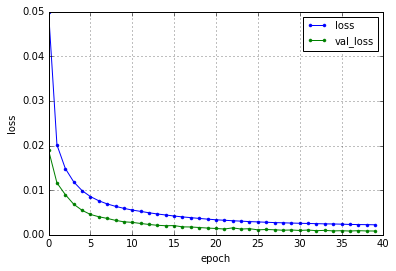

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0376 - val_loss: 0.0140
Epoch 2/50
15921/15921 [==============================] - 24s - loss: 0.0168 - val_loss: 0.0078
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0117 - val_loss: 0.0046
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0088 - val_loss: 0.0034
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0073 - val_loss: 0.0026
Epoch 6/50
15921/15921 [==============================] - 24s - loss: 0.0064 - val_loss: 0.0021
Epoch 7/50
15921/15921 [==============================] - 21s - loss: 0.0057 - val_loss: 0.0018
Epoch 8/50
15921/15921 [==============================] - 24s - loss: 0.0052 - val_loss: 0.0015
Epoch 9/50
15921/15921 [==============================] - 30s - loss: 0.0047 - val_loss: 0.0014
Epoch 10/50
15921/15921 [==============================] - 30s - loss: 0.0044 - val_lo

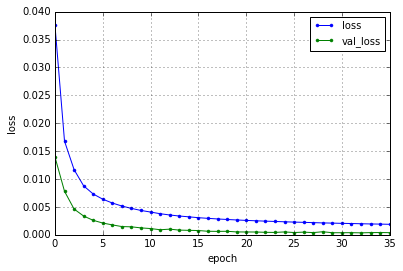

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0337 - val_loss: 0.0093
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0147 - val_loss: 0.0049
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0100 - val_loss: 0.0032
Epoch 4/50
15921/15921 [==============================] - 24s - loss: 0.0081 - val_loss: 0.0026
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0069 - val_loss: 0.0024
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0061 - val_loss: 0.0016
Epoch 7/50
15921/15921 [==============================] - 24s - loss: 0.0054 - val_loss: 0.0013
Epoch 8/50
15921/15921 [==============================] - 25s - loss: 0.0049 - val_loss: 0.0012
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0045 - val_loss: 0.0011
Epoch 10/50
15921/15921 [==============================] - 25s - loss: 0.0041 - val_lo

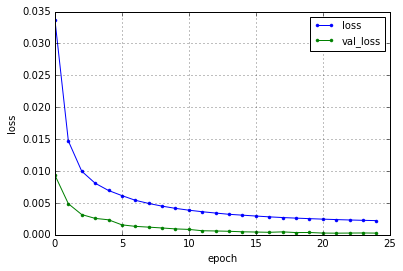

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0331 - val_loss: 0.0070
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0127 - val_loss: 0.0031
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0087 - val_loss: 0.0019
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0068 - val_loss: 0.0010
Epoch 5/50
15921/15921 [==============================] - 24s - loss: 0.0058 - val_loss: 8.5679e-04
Epoch 6/50
15921/15921 [==============================] - 24s - loss: 0.0051 - val_loss: 6.9283e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0046 - val_loss: 6.2263e-04
Epoch 8/50
15921/15921 [==============================] - 24s - loss: 0.0042 - val_loss: 7.2896e-04
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0039 - val_loss: 4.4080e-04
Epoch 10/50
15921/15921 [==============================] - 24s - l

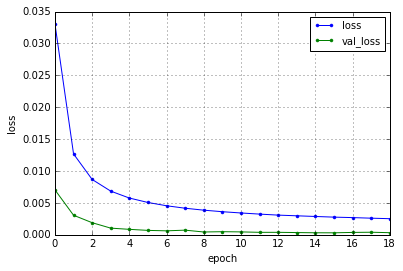

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 133s - loss: 0.0292 - val_loss: 0.0038
Epoch 2/50
15921/15921 [==============================] - 135s - loss: 0.0122 - val_loss: 0.0015
Epoch 3/50
15921/15921 [==============================] - 130s - loss: 0.0086 - val_loss: 0.0012
Epoch 4/50
15921/15921 [==============================] - 136s - loss: 0.0069 - val_loss: 7.0962e-04
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0059 - val_loss: 5.8413e-04
Epoch 6/50
15921/15921 [==============================] - 137s - loss: 0.0052 - val_loss: 4.5382e-04
Epoch 7/50
15921/15921 [==============================] - 131s - loss: 0.0047 - val_loss: 6.1821e-04
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0043 - val_loss: 3.6856e-04
Epoch 9/50
15921/15921 [==============================] - 132s - loss: 0.0040 - val_loss: 4.3935e-04
Epoch 10/50
15921/15921 [============================

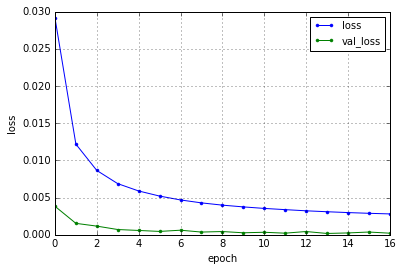

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 132s - loss: 0.0262 - val_loss: 0.0019
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.0104 - val_loss: 9.6191e-04
Epoch 3/50
15921/15921 [==============================] - 131s - loss: 0.0077 - val_loss: 4.9635e-04
Epoch 4/50
15921/15921 [==============================] - 130s - loss: 0.0065 - val_loss: 4.0807e-04
Epoch 5/50
15921/15921 [==============================] - 136s - loss: 0.0057 - val_loss: 3.8134e-04
Epoch 6/50
15921/15921 [==============================] - 131s - loss: 0.0051 - val_loss: 2.6425e-04
Epoch 7/50
15921/15921 [==============================] - 136s - loss: 0.0048 - val_loss: 3.3555e-04
Epoch 8/50
15921/15921 [==============================] - 129s - loss: 0.0044 - val_loss: 4.4183e-04
Epoch 9/50
15921/15921 [==============================] - 135s - loss: 0.0042 - val_loss: 2.3779e-04
Epoch 10/50
15921/15921 [====================

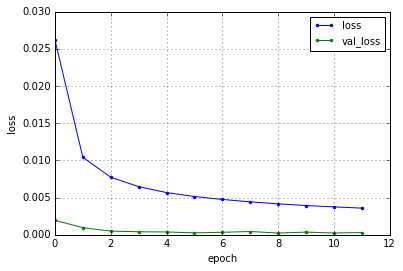

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 133s - loss: 0.0794 - val_loss: 0.0403
Epoch 2/50
15921/15921 [==============================] - 132s - loss: 0.0509 - val_loss: 0.0235
Epoch 3/50
15921/15921 [==============================] - 130s - loss: 0.0375 - val_loss: 0.0161
Epoch 4/50
15921/15921 [==============================] - 134s - loss: 0.0308 - val_loss: 0.0125
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0263 - val_loss: 0.0089
Epoch 6/50
15921/15921 [==============================] - 135s - loss: 0.0232 - val_loss: 0.0074
Epoch 7/50
15921/15921 [==============================] - 130s - loss: 0.0206 - val_loss: 0.0065
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0188 - val_loss: 0.0047
Epoch 9/50
15921/15921 [==============================] - 131s - loss: 0.0173 - val_loss: 0.0042
Epoch 10/50
15921/15921 [==============================] 

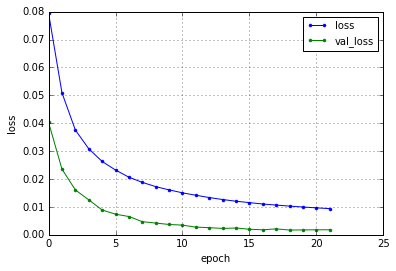

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 130s - loss: 0.0795 - val_loss: 0.0285
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.0457 - val_loss: 0.0137
Epoch 3/50
15921/15921 [==============================] - 130s - loss: 0.0346 - val_loss: 0.0096
Epoch 4/50
15921/15921 [==============================] - 135s - loss: 0.0285 - val_loss: 0.0075
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0247 - val_loss: 0.0056
Epoch 6/50
15921/15921 [==============================] - 137s - loss: 0.0217 - val_loss: 0.0038
Epoch 7/50
15921/15921 [==============================] - 131s - loss: 0.0197 - val_loss: 0.0035
Epoch 8/50
15921/15921 [==============================] - 137s - loss: 0.0180 - val_loss: 0.0031
Epoch 9/50
15921/15921 [==============================] - 131s - loss: 0.0167 - val_loss: 0.0033
Epoch 10/50
15921/15921 [==============================] - 133s - loss: 0.015

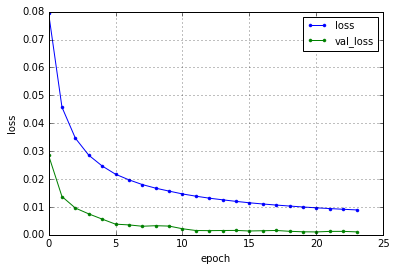

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 19s - loss: 0.1040 - val_loss: 0.0329
Epoch 2/50
15921/15921 [==============================] - 19s - loss: 0.0567 - val_loss: 0.0130
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0398 - val_loss: 0.0085
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0323 - val_loss: 0.0076
Epoch 5/50
15921/15921 [==============================] - 19s - loss: 0.0278 - val_loss: 0.0050
Epoch 6/50
15921/15921 [==============================] - 19s - loss: 0.0243 - val_loss: 0.0046
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0218 - val_loss: 0.0026
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0198 - val_loss: 0.0022
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.0182 - val_loss: 0.0022
Epoch 10/50
15921/15921 [==============================] - 20s - loss: 0.0169 - val_lo

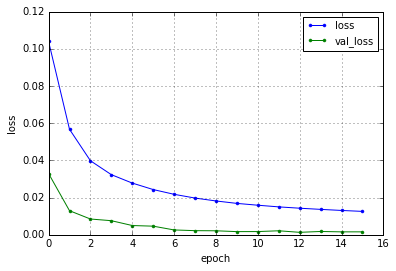

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 19s - loss: 0.0957 - val_loss: 0.0240
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0525 - val_loss: 0.0124
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0400 - val_loss: 0.0088
Epoch 4/50
15921/15921 [==============================] - 77s - loss: 0.0331 - val_loss: 0.0062
Epoch 5/50
15921/15921 [==============================] - 142s - loss: 0.0283 - val_loss: 0.0045
Epoch 6/50
15921/15921 [==============================] - 136s - loss: 0.0249 - val_loss: 0.0034
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0224 - val_loss: 0.0031
Epoch 8/50
15921/15921 [==============================] - 137s - loss: 0.0206 - val_loss: 0.0025
Epoch 9/50
15921/15921 [==============================] - 141s - loss: 0.0190 - val_loss: 0.0028
Epoch 10/50
15921/15921 [==============================] - 137s - loss: 0.0178 - 

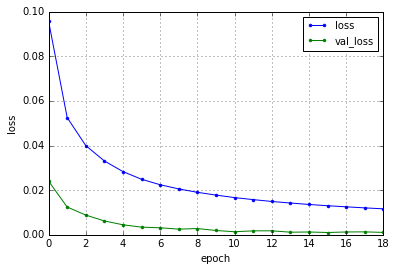

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 141s - loss: 0.1043 - val_loss: 0.0197
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.0540 - val_loss: 0.0113
Epoch 3/50
15921/15921 [==============================] - 141s - loss: 0.0413 - val_loss: 0.0073
Epoch 4/50
15921/15921 [==============================] - 136s - loss: 0.0343 - val_loss: 0.0044
Epoch 5/50
15921/15921 [==============================] - 141s - loss: 0.0298 - val_loss: 0.0023
Epoch 6/50
15921/15921 [==============================] - 135s - loss: 0.0265 - val_loss: 0.0018
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0242 - val_loss: 0.0025
Epoch 8/50
15921/15921 [==============================] - 136s - loss: 0.0223 - val_loss: 0.0021
Epoch 9/50
15921/15921 [==============================] - 139s - loss: 0.0208 - val_loss: 0.0023


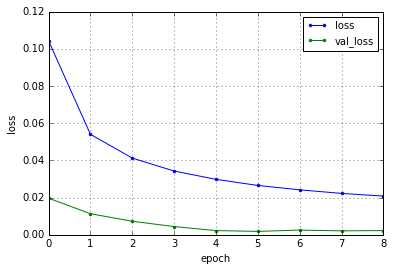

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.1200 - val_loss: 0.0215
Epoch 2/50
15921/15921 [==============================] - 135s - loss: 0.0625 - val_loss: 0.0117
Epoch 3/50
15921/15921 [==============================] - 140s - loss: 0.0480 - val_loss: 0.0078
Epoch 4/50
15921/15921 [==============================] - 134s - loss: 0.0402 - val_loss: 0.0040
Epoch 5/50
15921/15921 [==============================] - 139s - loss: 0.0353 - val_loss: 0.0033
Epoch 6/50
15921/15921 [==============================] - 134s - loss: 0.0318 - val_loss: 0.0022
Epoch 7/50
15921/15921 [==============================] - 141s - loss: 0.0290 - val_loss: 0.0023
Epoch 8/50
15921/15921 [==============================] - 135s - loss: 0.0267 - val_loss: 0.0030
Epoch 9/50
15921/15921 [==============================] - 140s - loss: 0.0249 - val_loss: 0.0021
Epoch 10/50
15921/15921 [==============================] - 135s - loss: 0.023

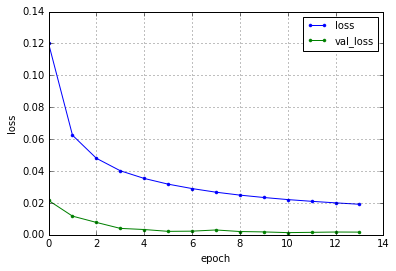

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 141s - loss: 0.1262 - val_loss: 0.0893
Epoch 2/50
15921/15921 [==============================] - 135s - loss: 0.1001 - val_loss: 0.0863
Epoch 3/50
15921/15921 [==============================] - 141s - loss: 0.0952 - val_loss: 0.0735
Epoch 4/50
15921/15921 [==============================] - 136s - loss: 0.0825 - val_loss: 0.0423
Epoch 5/50
15921/15921 [==============================] - 135s - loss: 0.0673 - val_loss: 0.0297
Epoch 6/50
15921/15921 [==============================] - 141s - loss: 0.0566 - val_loss: 0.0217
Epoch 7/50
15921/15921 [==============================] - 135s - loss: 0.0492 - val_loss: 0.0174
Epoch 8/50
15921/15921 [==============================] - 142s - loss: 0.0441 - val_loss: 0.0153
Epoch 9/50
15921/15921 [==============================] - 135s - loss: 0.0403 - val_loss: 0.0136
Epoch 10/50
15921/15921 [==============================] 

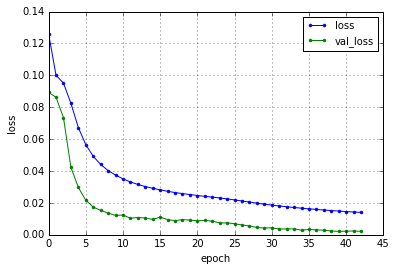

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1366 - val_loss: 0.0867
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.1014 - val_loss: 0.0813
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0909 - val_loss: 0.0443
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0740 - val_loss: 0.0263
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0618 - val_loss: 0.0224
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0533 - val_loss: 0.0125
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0478 - val_loss: 0.0124
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0434 - val_loss: 0.0102
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0400 - val_loss: 0.0095
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0373 - val_lo

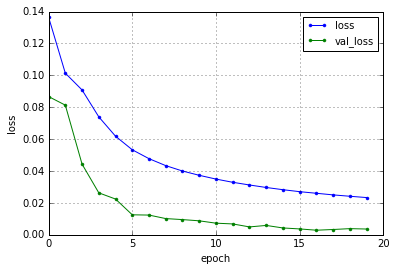

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1517 - val_loss: 0.0873
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1103 - val_loss: 0.0778
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0961 - val_loss: 0.0422
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0782 - val_loss: 0.0248
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0663 - val_loss: 0.0196
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0583 - val_loss: 0.0190
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0525 - val_loss: 0.0140
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0482 - val_loss: 0.0141
Epoch 9/50
15921/15921 [==============================] - 13s - loss: 0.0449 - val_loss: 0.0124
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0421 - val_lo

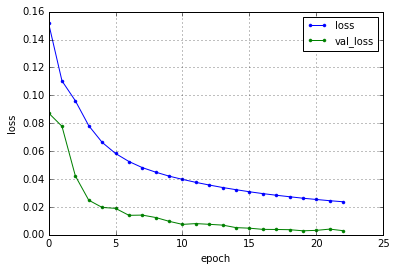

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1388 - val_loss: 0.0838
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1096 - val_loss: 0.0746
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0975 - val_loss: 0.0412
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0813 - val_loss: 0.0250
Epoch 5/50
15921/15921 [==============================] - 13s - loss: 0.0689 - val_loss: 0.0180
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0609 - val_loss: 0.0123
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0546 - val_loss: 0.0147
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0501 - val_loss: 0.0133
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0468 - val_loss: 0.0113
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0439 - val_lo

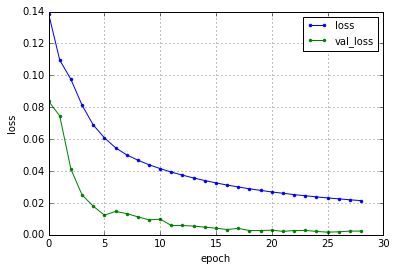

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2024 - val_loss: 0.0833
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1259 - val_loss: 0.0696
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1080 - val_loss: 0.0397
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0902 - val_loss: 0.0257
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0785 - val_loss: 0.0162
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0701 - val_loss: 0.0168
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0639 - val_loss: 0.0107
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0591 - val_loss: 0.0114
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0552 - val_loss: 0.0094
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0520 - val_lo

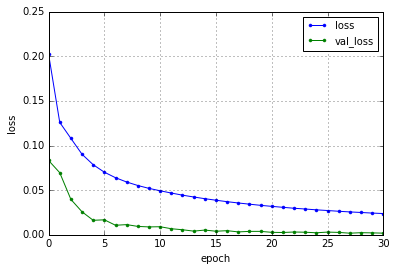

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2180 - val_loss: 0.0825
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1405 - val_loss: 0.0724
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1222 - val_loss: 0.0354
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.1029 - val_loss: 0.0288
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0896 - val_loss: 0.0176
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0808 - val_loss: 0.0179
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0742 - val_loss: 0.0112
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0691 - val_loss: 0.0135
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0650 - val_loss: 0.0106
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0614 - val_lo

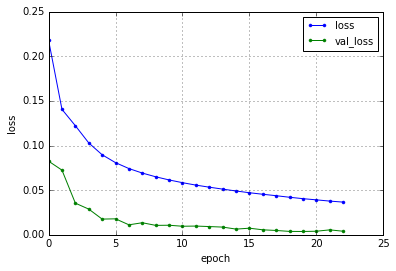

L1 parameter is 0.5
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1173 - val_loss: 0.0878
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1035 - val_loss: 0.0849
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0991 - val_loss: 0.0811
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0922 - val_loss: 0.0591
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0811 - val_loss: 0.0421
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0707 - val_loss: 0.0266
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0632 - val_loss: 0.0198
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0574 - val_loss: 0.0165
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0527 - val_loss: 0.0178
Epoch 10/50
15921/15921 [==============================] - 15s - l

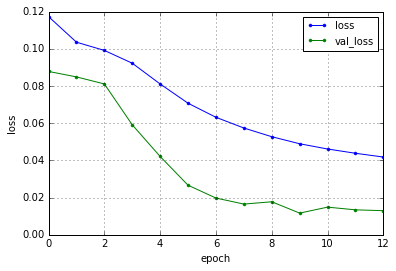

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1647 - val_loss: 0.0882
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1171 - val_loss: 0.0870
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1103 - val_loss: 0.0851
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1056 - val_loss: 0.0777
Epoch 5/50
15921/15921 [==============================] - 13s - loss: 0.0970 - val_loss: 0.0532
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0856 - val_loss: 0.0378
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0761 - val_loss: 0.0269
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0686 - val_loss: 0.0201
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0630 - val_loss: 0.0167
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0585 - val_lo

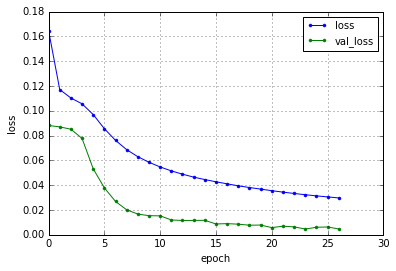

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.2006 - val_loss: 0.0855
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1279 - val_loss: 0.0836
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1190 - val_loss: 0.0791
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1114 - val_loss: 0.0646
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1002 - val_loss: 0.0457
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0884 - val_loss: 0.0322
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0784 - val_loss: 0.0220
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0709 - val_loss: 0.0182
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0652 - val_loss: 0.0177
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0605 - val_lo

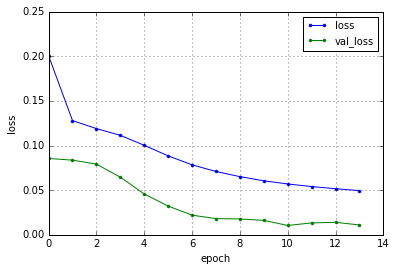

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2107 - val_loss: 0.0840
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1285 - val_loss: 0.0845
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1202 - val_loss: 0.0782
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.1140 - val_loss: 0.0676
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1060 - val_loss: 0.0615
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0953 - val_loss: 0.0448
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0848 - val_loss: 0.0209
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0768 - val_loss: 0.0230
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0707 - val_loss: 0.0153
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0659 - val_lo

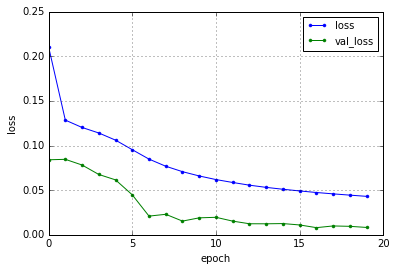

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 12s - loss: 0.2408 - val_loss: 0.0865
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1546 - val_loss: 0.0858
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1429 - val_loss: 0.0828
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.1347 - val_loss: 0.0757
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.1247 - val_loss: 0.0425
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.1135 - val_loss: 0.0413
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.1016 - val_loss: 0.0299
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0930 - val_loss: 0.0262
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0858 - val_loss: 0.0208
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0802 - val_lo

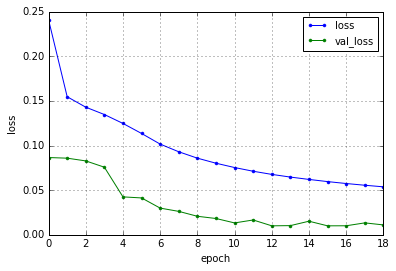

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2896 - val_loss: 0.0830
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1775 - val_loss: 0.0846
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1623 - val_loss: 0.0779
Epoch 4/50
15921/15921 [==============================] - 8s - loss: 0.1527 - val_loss: 0.0775
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1410 - val_loss: 0.0559
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1282 - val_loss: 0.0352
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1166 - val_loss: 0.0286
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1076 - val_loss: 0.0192
Epoch 9/50
15921/15921 [==============================] - 8s - loss: 0.1003 - val_loss: 0.0217
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0945 - val_loss: 0.0134

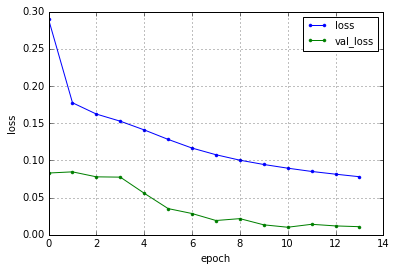

L1 parameter is 0.7
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1293 - val_loss: 0.0899
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1080 - val_loss: 0.0889
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1044 - val_loss: 0.0858
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1013 - val_loss: 0.0802
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0965 - val_loss: 0.0656
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0889 - val_loss: 0.0459
Epoch 7/50
15921/15921 [==============================] - 8s - loss: 0.0806 - val_loss: 0.0406
Epoch 8/50
15921/15921 [==============================] - 7s - loss: 0.0734 - val_loss: 0.0278
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0671 - val_loss: 0.0218
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.062

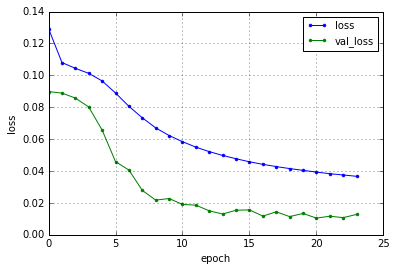

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1805 - val_loss: 0.0889
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1198 - val_loss: 0.0881
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1146 - val_loss: 0.0864
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1113 - val_loss: 0.0810
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1078 - val_loss: 0.0758
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1024 - val_loss: 0.0612
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0941 - val_loss: 0.0511
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0864 - val_loss: 0.0388
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0789 - val_loss: 0.0289
Epoch 10/50
15921/15921 [==============================] - 8s - loss: 0.0734 - val_loss: 0.0221

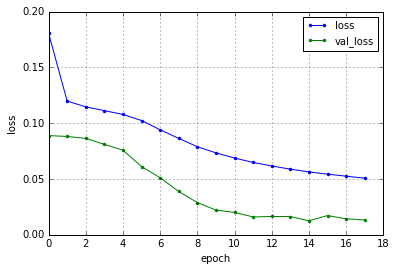

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2294 - val_loss: 0.0889
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1392 - val_loss: 0.0877
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1294 - val_loss: 0.0856
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1235 - val_loss: 0.0849
Epoch 5/50
15921/15921 [==============================] - 8s - loss: 0.1192 - val_loss: 0.0777
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1141 - val_loss: 0.0665
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1072 - val_loss: 0.0555
Epoch 8/50
15921/15921 [==============================] - 10s - loss: 0.0981 - val_loss: 0.0346
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0899 - val_loss: 0.0229
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0828 - val_loss: 0.027

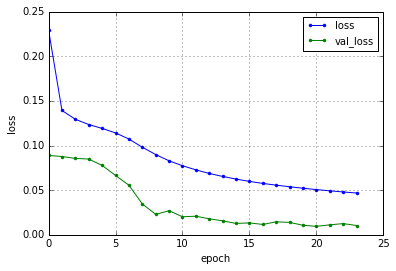

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2166 - val_loss: 0.0875
Epoch 2/50
15921/15921 [==============================] - 10s - loss: 0.1442 - val_loss: 0.0856
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1346 - val_loss: 0.0833
Epoch 4/50
15921/15921 [==============================] - 10s - loss: 0.1289 - val_loss: 0.0826
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1238 - val_loss: 0.0763
Epoch 6/50
15921/15921 [==============================] - 10s - loss: 0.1177 - val_loss: 0.0642
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1093 - val_loss: 0.0528
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1003 - val_loss: 0.0280
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0925 - val_loss: 0.0349
Epoch 10/50
15921/15921 [==============================] - 7s - loss: 0.0860 - val_loss: 0.0

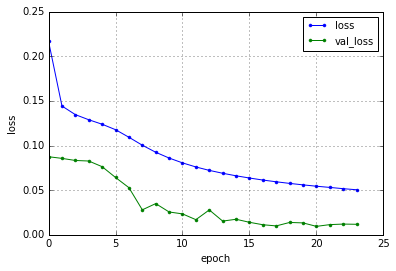

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3140 - val_loss: 0.0857
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1836 - val_loss: 0.0852
Epoch 3/50
15921/15921 [==============================] - 10s - loss: 0.1666 - val_loss: 0.0835
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1571 - val_loss: 0.0804
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1494 - val_loss: 0.0770
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1415 - val_loss: 0.0631
Epoch 7/50
15921/15921 [==============================] - 10s - loss: 0.1319 - val_loss: 0.0520
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1219 - val_loss: 0.0276
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1126 - val_loss: 0.0286
Epoch 10/50
15921/15921 [==============================] - 10s - loss: 0.1049 - val_loss: 0.0

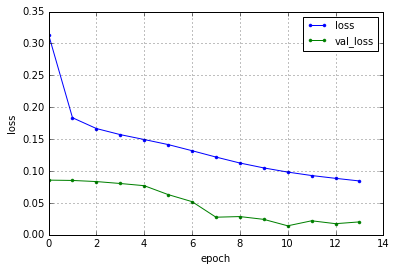

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3897 - val_loss: 0.0840
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.2175 - val_loss: 0.0899
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1952 - val_loss: 0.0859
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1844 - val_loss: 0.0843


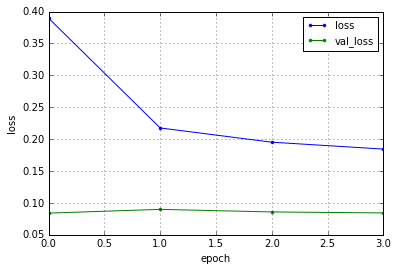

L1 parameter is 0.9
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1517 - val_loss: 0.0885
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1190 - val_loss: 0.0879
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1134 - val_loss: 0.0884
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1096 - val_loss: 0.0865
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1071 - val_loss: 0.0832
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1049 - val_loss: 0.0832
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1024 - val_loss: 0.0817
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0992 - val_loss: 0.0768
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0941 - val_loss: 0.0540
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.087

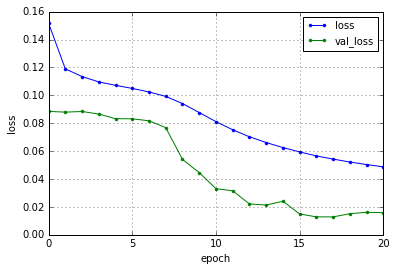

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2323 - val_loss: 0.0885
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1444 - val_loss: 0.0880
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1337 - val_loss: 0.0878
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1274 - val_loss: 0.0861
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1234 - val_loss: 0.0852
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1202 - val_loss: 0.0851
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1169 - val_loss: 0.0723
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1130 - val_loss: 0.0702
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1073 - val_loss: 0.0630
Epoch 10/50
15921/15921 [==============================] - 8s - loss: 0.1010 - val_loss: 0.0410

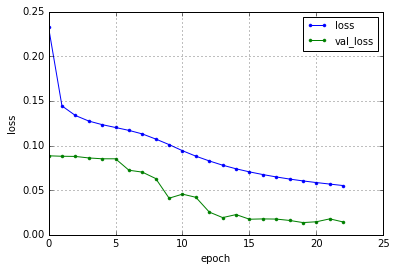

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2651 - val_loss: 0.0883
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1552 - val_loss: 0.0855
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1413 - val_loss: 0.0841
Epoch 4/50
15921/15921 [==============================] - 10s - loss: 0.1336 - val_loss: 0.0844
Epoch 5/50
15921/15921 [==============================] - 7s - loss: 0.1290 - val_loss: 0.0838
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1250 - val_loss: 0.0846
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1207 - val_loss: 0.0666
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1158 - val_loss: 0.0632
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1092 - val_loss: 0.0482
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.1026 - val_loss: 0.042

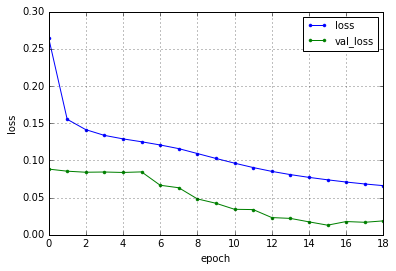

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2670 - val_loss: 0.0882
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1692 - val_loss: 0.0872
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1551 - val_loss: 0.0875
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1465 - val_loss: 0.0863
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1408 - val_loss: 0.0817
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1361 - val_loss: 0.0807
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1316 - val_loss: 0.0749
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1262 - val_loss: 0.0695
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1196 - val_loss: 0.0510
Epoch 10/50
15921/15921 [==============================] - 8s - loss: 0.1129 - val_loss: 0.0403

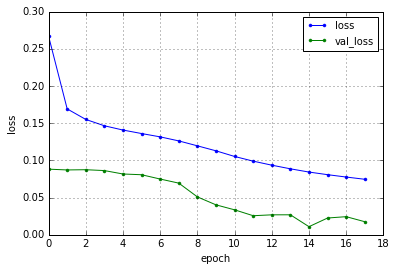

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3518 - val_loss: 0.0891
Epoch 2/50
15921/15921 [==============================] - 8s - loss: 0.2149 - val_loss: 0.0847
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1932 - val_loss: 0.0849
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1801 - val_loss: 0.0838
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1714 - val_loss: 0.0809
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1644 - val_loss: 0.0807
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1574 - val_loss: 0.0777
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1503 - val_loss: 0.0567
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1426 - val_loss: 0.0454
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.1343 - val_loss: 0.0397

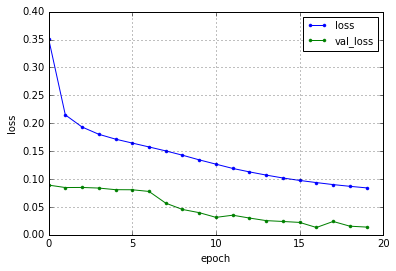

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 7s - loss: 0.5302 - val_loss: 0.0862
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.2694 - val_loss: 0.0868
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.2364 - val_loss: 0.0874
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.2206 - val_loss: 0.0872


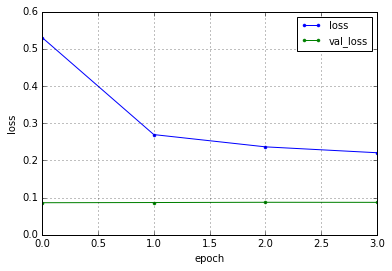

In [10]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()